In [1]:
from popsborder.simulation import run_simulation
from popsborder.scenarios import run_scenarios
from popsborder.inputs import load_configuration, load_scenario_table
from popsborder.outputs import save_scenario_result_to_pandas, print_totals_as_text

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set path to folder containing config and scenario files
datadir = os.path.join(os.getcwd(), "data")
# Set path to folder for saving results and automatically create folder if it doesn't exist
resultsdir = os.path.join(os.getcwd(), "results")
# Make sure the directory exists
if not os.path.exists(resultsdir):
    os.mkdir(resultsdir)

### Run a single simulation

In [3]:
config_path = datadir + "/user_friendly_config.xlsx"

In [4]:
num_simulations = 1
num_consignments = 5
config = load_configuration(config_path, sheet=None, key_column="D", value_column="B")
results = run_simulation(
    config,
    num_simulations,
    num_consignments,
    seed=42,
    output_f280_file=None,
    verbose=False,
    pretty="boxes",
    detailed=False,
)
print_totals_as_text(num_consignments, config, totals=results)

━━ Consignment ━━ Boxes: 4 ━━ Items: 200 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ | ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ | ✿ ✿ 🐛 🐛 🐛 🐛 ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ | ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿
━━ Consignment ━━ Boxes: 1 ━━ Items: 21 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ 🐛 ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿
━━ Consignment ━━ Boxes: 1 ━━ Items: 24 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✿ ✿ ✿ ✿ ✿ ✿ 🐛 ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿
━━ Consignment ━━ Boxes: 1 ━━ Items: 30 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🐛 🐛 🐛 🐛 🐛 ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿
━━ Consignment ━━ Boxes: 1 ━━ Items: 20 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🐛 ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿ ✿

### Run multiple scenarios

In [5]:
scenario_configs_path = datadir + "/scenarios_config.csv"

In [6]:
num_consignments = 100
scenario_configs = load_configuration(config, sheet=None, key_column="D", value_column="B")
results = run_scenarios(
    config=scenario_configs,
    scenario_table=load_scenario_table(scenario_configs_path),
    seed=42,
    num_simulations=10,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: item 0.01 hypergeometric random
Running scenario: item 0.05 hypergeometric random
Running scenario: item 0.1 hypergeometric random
Running scenario: item 0.25 hypergeometric random
Running scenario: item 0.01 hypergeometric convenience
Running scenario: item 0.05 hypergeometric convenience
Running scenario: item 0.1 hypergeometric convenience
Running scenario: item 0.25 hypergeometric convenience


In [7]:
results_df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "contamination/contamination_rate/value",
        "contamination/arrangement",
        "inspection/selection_strategy",
        "inspection/unit",
        "inspection/sample_strategy",
    ],
    result_columns=[
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "pct_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "pct_boxes_opened_detection",
        "avg_items_inspected_completion",
        "pct_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_items_inspected_detection",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
        "num_boxes",
        "num_items",
    ],
)

In [8]:
results_df['failure rate'] = results_df["intercepted"] / num_consignments
contaminated_consignments = results_df["false_neg"] + results_df["intercepted"]
results_df["interception rate"] = results_df["intercepted"] / contaminated_consignments
results_df["% missed contaminants"] = (results_df["total_missed_contaminants"] / (results_df["total_missed_contaminants"] + results_df["total_intercepted_contaminants"])) * 100

In [9]:
results_df

,name,contamination/contamination_rate/value,contamination/arrangement,inspection/selection_strategy,inspection/unit,inspection/sample_strategy,true_contamination_rate,max_missed_contamination_rate,avg_missed_contamination_rate,max_intercepted_contamination_rate,...,pct_items_inspected_detection,false_neg,intercepted,total_missed_contaminants,total_intercepted_contaminants,num_boxes,num_items,failure rate,interception rate,% missed contaminants
0,item 0.01 hypergeometric random,0.01,clustered,random,item,hypergeometric,0.032088,0.001815,0.001646,0.282009,...,0.170459,0.8,46.8,15.0,67702.2,25129.0,1253499.0,0.468,0.983193,0.022151
1,item 0.05 hypergeometric random,0.01,clustered,random,item,hypergeometric,0.032088,0.032253,0.015220,0.282009,...,0.103941,8.7,38.9,2204.9,65512.3,25129.0,1253499.0,0.389,0.817227,3.256041
2,item 0.1 hypergeometric random,0.01,clustered,random,item,hypergeometric,0.032088,0.070011,0.025376,0.282009,...,0.073371,13.4,34.2,5955.5,61761.7,25129.0,1253499.0,0.342,0.718487,8.794664
3,item 0.25 hypergeometric random,0.01,clustered,random,item,hypergeometric,0.032088,0.123307,0.041982,0.282009,...,0.043000,25.3,22.3,17830.8,49886.4,25129.0,1253499.0,0.223,0.468487,26.331272
4,item 0.01 hypergeometric convenience,0.01,clustered,convenience,item,hypergeometric,0.032088,0.036319,0.015313,0.282009,...,0.293706,4.6,43.0,8932.8,58784.4,25129.0,1253499.0,0.430,0.903361,13.191331
5,item 0.05 hypergeometric convenience,0.01,clustered,convenience,item,hypergeometric,0.032088,0.118113,0.037348,0.282009,...,0.140247,18.1,29.5,27317.1,40400.1,25129.0,1253499.0,0.295,0.619748,40.339973
6,item 0.1 hypergeometric convenience,0.01,clustered,convenience,item,hypergeometric,0.032088,0.132460,0.045391,0.282009,...,0.090403,25.0,22.6,51655.5,16061.7,25129.0,1253499.0,0.226,0.474790,76.281211
7,item 0.25 hypergeometric convenience,0.01,clustered,convenience,item,hypergeometric,0.032088,0.174162,0.049820,0.272619,...,0.046614,31.8,15.8,66386.0,1331.2,25129.0,1253499.0,0.158,0.331933,98.034177


Text(0.5, 0, 'Pct. missed contaminants')

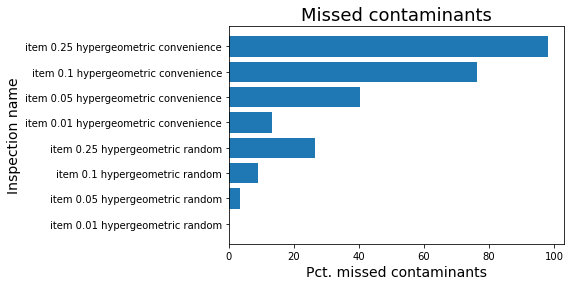

In [10]:
plt.barh(results_df["name"], results_df["% missed contaminants"])
plt.title("Missed contaminants", fontsize=18)
plt.ylabel("Inspection name", fontsize=14)
plt.xlabel("Pct. missed contaminants", fontsize=14)

Text(0.5, 0, 'Pct. items inspected')

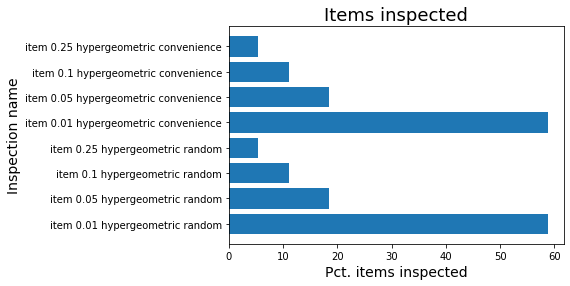

In [11]:
plt.barh(results_df["name"], results_df["pct_items_inspected_completion"]*100)
plt.title("Items inspected", fontsize=18)
plt.ylabel("Inspection name", fontsize=14)
plt.xlabel("Pct. items inspected", fontsize=14)

Text(0.5, 0, 'Pct. items inspected')

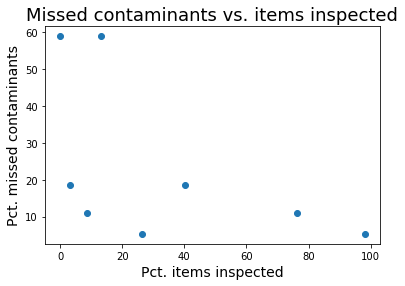

In [12]:
plt.scatter(results_df["% missed contaminants"], results_df["pct_items_inspected_completion"]*100)
plt.title("Missed contaminants vs. items inspected", fontsize=18)
plt.ylabel("Pct. missed contaminants", fontsize=14)
plt.xlabel("Pct. items inspected", fontsize=14)